In [101]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
# from vietocr.tool.predictor import Predictor
# from vietocr.tool.config import Cfg
# from PIL import Image

# config = Cfg.load_config_from_name('vgg_transformer')
# config['device'] = 'cuda'  # đổi thành 'cuda' nếu có GPU

(np.float64(-0.5), np.float64(984.5), np.float64(764.5), np.float64(-0.5))

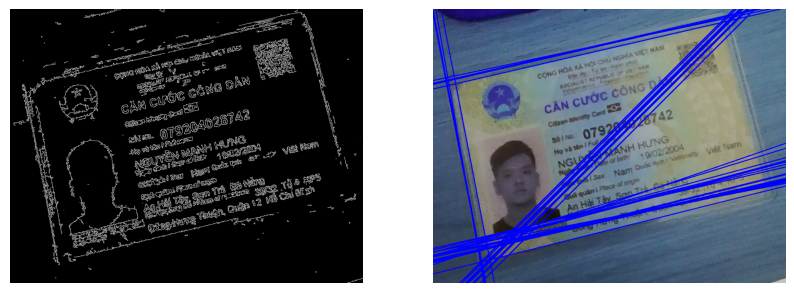

In [102]:
img = cv2.imread(r"temp\temp17.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_canny = cv2.Canny(img_gray, 50, 200)
lines = cv2.HoughLines(img_canny, 1, np.pi/180, 180)
test = img.copy()
for line in lines:
    rho, theta = line[0]

    # Tính toán theo công thức: ρ = x·cosθ + y·sinθ
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho

    # Tọa độ 2 điểm xa nhau (để kéo dài line)
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    # Vẽ line lên ảnh gốc
    cv2.line(test, (x1, y1), (x2, y2), (0, 0, 255), 2)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(img_canny, cmap='gray')
axs[1].imshow(test, cmap='gray')
axs[0].axis('off')
axs[1].axis('off')

-13.000001


(np.float64(-0.5), np.float64(984.5), np.float64(764.5), np.float64(-0.5))

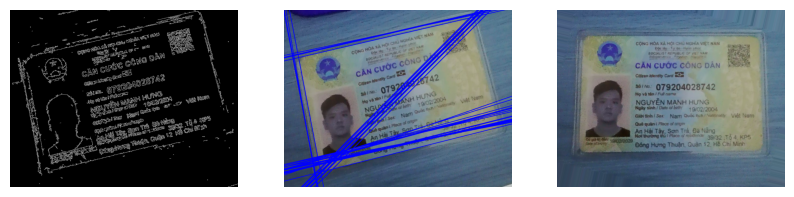

In [103]:
height, width = img.shape[:2]
center = (width//2, height//2)
horizontal_theta = 0 
min_horizontal_rad = np.deg2rad(45)
max_horizontal_rad = np.deg2rad(135)
for line in lines:
    rho, theta = line[0]

    if min_horizontal_rad < theta < max_horizontal_rad:
        horizontal_theta = theta
        break

angle_rad = horizontal_theta - (np.pi/2)
angle_deg = np.rad2deg(angle_rad)
print(angle_deg)
M = cv2.getRotationMatrix2D(center=center, angle=angle_deg, scale=1)

rotated_image = cv2.warpAffine(
    src=img.copy(), M=M, dsize=(width, height), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].imshow(img_canny, cmap='gray')
axs[1].imshow(test, cmap='gray')
axs[2].imshow(rotated_image, cmap='gray')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

[[[ 1.1600000e+02  1.5707964e+00]]

 [[ 9.2000000e+01  3.4906585e-02]]

 [[ 1.0400000e+02  1.5707964e+00]]

 [[ 5.5000000e+02  1.5707964e+00]]

 [[ 1.0200000e+02  1.5707964e+00]]

 [[ 9.4000000e+01  3.4906585e-02]]

 [[ 5.5400000e+02  1.5533431e+00]]

 [[ 5.5900000e+02  1.5533431e+00]]

 [[ 5.6900000e+02  1.5358897e+00]]

 [[ 1.1700000e+02  3.4906585e-02]]

 [[ 5.7000000e+02  1.5882496e+00]]

 [[ 1.0000000e+02  5.2359879e-02]]

 [[ 5.6700000e+02  1.5358897e+00]]

 [[ 5.8600000e+02  1.5533431e+00]]

 [[ 1.0900000e+02  1.5533431e+00]]

 [[-8.8300000e+02  3.1066861e+00]]

 [[ 1.0200000e+02  3.4906585e-02]]

 [[ 1.0700000e+02  1.5533431e+00]]

 [[ 5.6100000e+02  1.6057029e+00]]

 [[ 9.3000000e+01  1.5882496e+00]]

 [[ 9.6000000e+01  1.5882496e+00]]

 [[ 5.7100000e+02  1.5184364e+00]]

 [[ 4.5500000e+02  1.5707964e+00]]

 [[ 5.8500000e+02  1.5707964e+00]]

 [[ 1.2400000e+02  1.5358897e+00]]

 [[ 5.7800000e+02  1.5707964e+00]]

 [[ 5.8200000e+02  1.5707964e+00]]

 [[ 1.1500000e+02  1.5533431

(np.float64(-0.5), np.float64(984.5), np.float64(764.5), np.float64(-0.5))

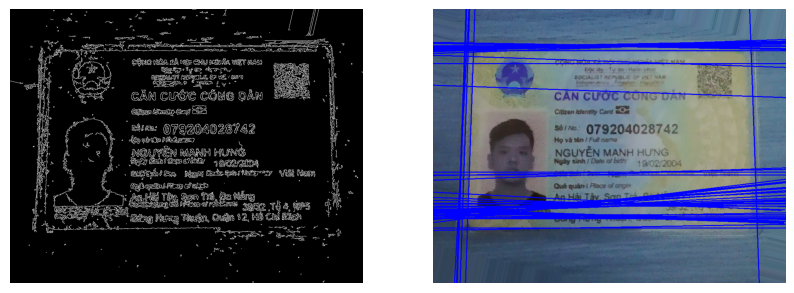

In [104]:
canny_after = cv2.Canny(rotated_image, 50, 150)
lines_after = cv2.HoughLines(canny_after, 1, np.pi/180, 180)
print(lines_after)

test_after = rotated_image.copy()
for line in lines_after:
    rho, theta = line[0]

    # Tính toán theo công thức: ρ = x·cosθ + y·sinθ
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho

    # Tọa độ 2 điểm xa nhau (để kéo dài line)
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    # Vẽ line lên ảnh gốc
    cv2.line(test_after, (x1, y1), (x2, y2), (0, 0, 255), 2)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(canny_after, cmap='gray')
axs[1].imshow(test_after, cmap='gray')
axs[0].axis('off')
axs[1].axis('off')

In [99]:
def line_intersection(line1, line2):
    rho1, theta1 = line1
    rho2, theta2 = line2
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([rho1, rho2])
    # Dùng lstsq để giải ổn định hơn, tránh lỗi suy biến
    x0, y0 = np.linalg.lstsq(A, b, rcond=None)[0]
    return [int(np.round(x0)), int(np.round(y0))]

In [ ]:
horizontal_lines = []
vertical_lines = []

angle_threshold_rad = np.deg2rad(20) # 20 độ
horizontal_target_rad = np.pi / 2    # 90 độ

for line in lines_after:
    rho, theta = line[0]
    
    # Kiểm tra đường ngang (gần 90 độ)
    if abs(theta - horizontal_target_rad) < angle_threshold_rad:
        horizontal_lines.append((rho, theta))
    
    # Kiểm tra đường dọc (gần 0 hoặc 180 độ)
    elif abs(theta) < angle_threshold_rad or abs(theta - np.pi) < angle_threshold_rad:
        vertical_lines.append((rho, theta))

if not horizontal_lines or not vertical_lines:
    print("Không tìm đủ đường ngang hoặc dọc, hãy thử điều chỉnh ngưỡng Canny hoặc HoughLines.")
else:
    # --- BƯỚC 2: Tìm 4 Đường Viền Chính ---
    
    # Sắp xếp các đường theo 'rho'
    horizontal_lines.sort(key=lambda x: x[0]) # Sắp xếp theo rho
    vertical_lines.sort(key=lambda x: x[0])   # Sắp xếp theo rho

    # Lấy min/max rho.
    # Để an toàn hơn, ta có thể lấy trung bình của 5 đường đầu/cuối
    
    # Lấy đường có rho nhỏ nhất và lớn nhất
    top_line = horizontal_lines[0]
    bottom_line = horizontal_lines[-1]
    left_line = vertical_lines[-1]
    right_line = vertical_lines[0]

    # print(top_line, bottom_line, left_line, right_line)

[(np.float32(116.0), np.float32(1.5707964)), (np.float32(104.0), np.float32(1.5707964)), (np.float32(550.0), np.float32(1.5707964)), (np.float32(102.0), np.float32(1.5707964)), (np.float32(554.0), np.float32(1.553343)), (np.float32(559.0), np.float32(1.553343)), (np.float32(569.0), np.float32(1.5358897)), (np.float32(570.0), np.float32(1.5882496)), (np.float32(567.0), np.float32(1.5358897)), (np.float32(586.0), np.float32(1.553343)), (np.float32(109.0), np.float32(1.553343)), (np.float32(107.0), np.float32(1.553343)), (np.float32(561.0), np.float32(1.6057029)), (np.float32(93.0), np.float32(1.5882496)), (np.float32(96.0), np.float32(1.5882496)), (np.float32(571.0), np.float32(1.5184364)), (np.float32(455.0), np.float32(1.5707964)), (np.float32(585.0), np.float32(1.5707964)), (np.float32(124.0), np.float32(1.5358897)), (np.float32(578.0), np.float32(1.5707964)), (np.float32(582.0), np.float32(1.5707964)), (np.float32(115.0), np.float32(1.553343)), (np.float32(575.0), np.float32(1.500983

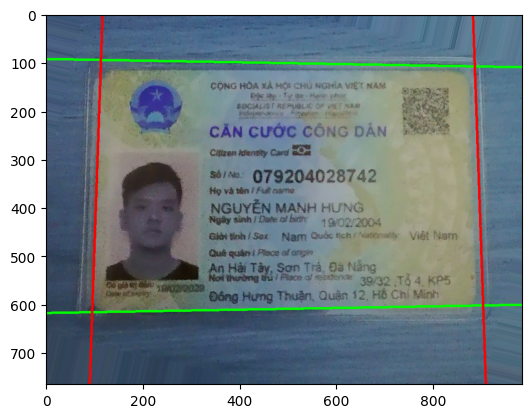

In [68]:
def draw_line(img, line, color):
        rho, theta = line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 2000 * (-b))
        y1 = int(y0 + 2000 * (a))
        x2 = int(x0 - 2000 * (-b))
        y2 = int(y0 - 2000 * (a))

        cv2.line(img, (x1, y1), (x2, y2), color, 3) # Vẽ dày hơn
    
debug_lines_image = rotated_image.copy()
draw_line(debug_lines_image, top_line, (0, 255, 0))    # Xanh lá
draw_line(debug_lines_image, bottom_line, (0, 255, 0)) # Xanh lá
draw_line(debug_lines_image, left_line, (255, 0, 0))   # Xanh dương
draw_line(debug_lines_image, right_line, (255, 0, 0))  # Xanh dương

plt.imshow(debug_lines_image)

In [69]:
corner_tl = line_intersection(top_line, left_line)
corner_tr = line_intersection(top_line, right_line)
corner_bl = line_intersection(bottom_line, left_line)
corner_br = line_intersection(bottom_line, right_line)

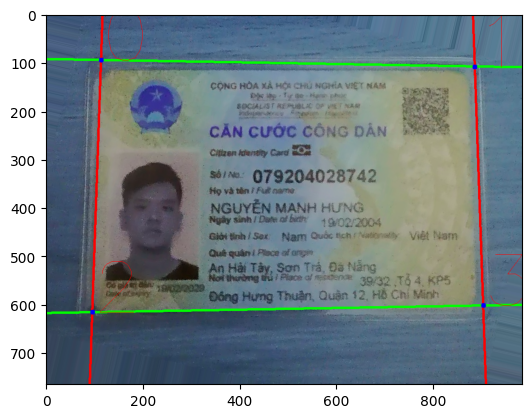

In [70]:
for i, (x, y) in enumerate([corner_tl, corner_tr, corner_bl, corner_br]):
    cv2.circle(debug_lines_image, (x, y), 5, (0, 0, 255), -1)
    cv2.putText(debug_lines_image, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 0, 0))

plt.imshow(debug_lines_image)

In [71]:
src_points = np.float32([corner_tl, corner_tr, corner_br, corner_bl])

In [72]:
# Tính chiều rộng và chiều cao mới
# Chiều rộng = khoảng cách trung bình giữa (tl, tr) và (bl, br)
width_top = np.linalg.norm(np.array(corner_tl) - np.array(corner_tr))
width_bottom = np.linalg.norm(np.array(corner_bl) - np.array(corner_br))
max_width = int(max(width_top, width_bottom))
# Chiều cao = khoảng cách trung bình giữa (tl, bl) và (tr, br)
height_left = np.linalg.norm(np.array(corner_tl) - np.array(corner_bl))
height_right = np.linalg.norm(np.array(corner_tr) - np.array(corner_br))
max_height = int(max(height_left, height_right))

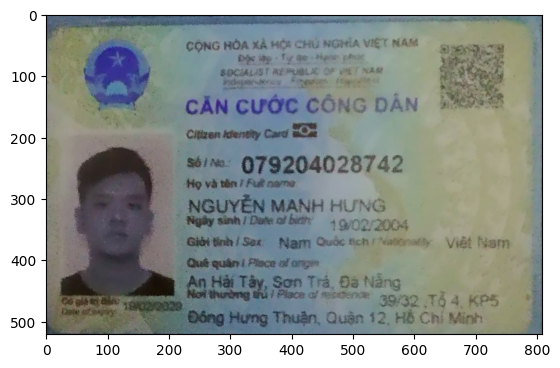

In [73]:
# Tọa độ đích (hình chữ nhật hoàn hảo)
dst_points = np.float32([
    [0, 0],              # Top-left
    [max_width - 1, 0],  # Top-right
    [max_width - 1, max_height - 1], # Bottom-right
    [0, max_height - 1]  # Bottom-left
])

# Lấy ma trận biến đổi
M = cv2.getPerspectiveTransform(src_points, dst_points)

# Áp dụng biến đổi
cropped_image = cv2.warpPerspective(rotated_image, M, (max_width, max_height))

plt.imshow(cropped_image)